In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('winequality-red.xlsx - winequality-red.csv')

UNIVARIATE ANALYSIS

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.shape

(1599, 12)

BIVARIATE ANALYSIS

In [8]:
# sns.pairplot(data)

In [9]:
%matplotlib inline
corr = data.corr()
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='turbo_r')

DATA PREPROCESSING

In [10]:
X, y = data.drop(['quality'], axis=1), data['quality']

In [16]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

MACHINE LEARNING

In [22]:
train_x.shape

(1279, 11)

In [24]:
train_y.value_counts()

5    541
6    504
7    169
4     40
8     16
3      9
Name: quality, dtype: int64

In [43]:
from tensorflow import keras

inputs = keras.Input(train_x.shape[1])
layer = keras.layers.Dense(10, activation='relu')(inputs)
layer2 = keras.layers.Dense(5, activation='relu')(layer)
outputs = keras.layers.Dense(1, activation='relu')(layer2)
model = keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [44]:
history = model.fit(train_x, train_y, epochs=200, batch_size=32, validation_split=0.2, shuffle=False)

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 30.5400 - mean_squared_error: 30.5400 - val_loss: 28.4913 - val_mean_squared_error: 28.4913
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 26.3910 - mean_squared_error: 26.3910 - val_loss: 23.3300 - val_mean_squared_error: 23.3300
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 20.8468 - mean_squared_error: 20.8468 - val_loss: 17.6299 - val_mean_squared_error: 17.6299
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 15.1510 - mean_squared_error: 15.1510 - val_loss: 12.1195 - val_mean_squared_error: 12.1195
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 10.0680 - mean_squared_error: 10.0680 - val_loss: 7.6423 - val_mean_squared_error: 7.6423
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 6.2931 - mean_squared_error: 6.2931 - val_loss: 4.6208 - val_mean_squared_error: 4.6208
Epoch 7/200
32/3

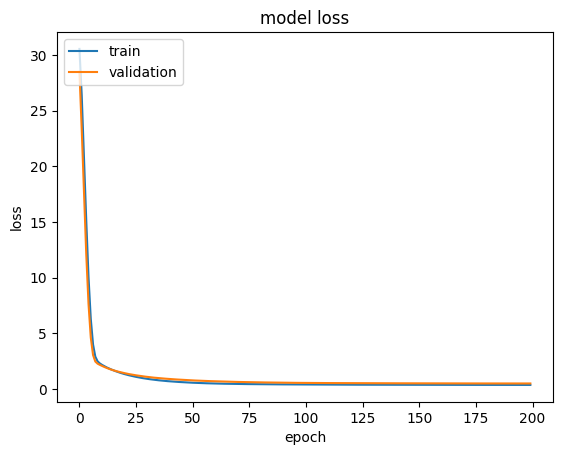

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [46]:
preds = model.predict(test_x)

10/10 [==============================] - 0s 979us/step


In [57]:
np.sqrt(np.mean((test_y - preds)**2))

0.6944231270120349

model can predict with a error range of +- 0.69

In [58]:
(np.mean(np.abs(((test_y - preds) / test_y))))*100


9.558258268804778

model will be off by 9.5% 